In [4]:
def weighted_average(grp):
    return grp._get_numeric_data().multiply(grp['PERWT'], axis=0).sum()/grp['PERWT'].sum()

In [5]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Load the datasets...

In [7]:
df = pd.read_csv("data/2000.csv", usecols = ["BPL", "EDUCD", "AGE", "PERWT"])

In [8]:
gdf = gpd.read_file("cb_state/cb_2015_us_state_20m.shp")

### Bachelor's variable...

In [12]:
bachelors_mask = df.EDUCD > 100
df["BACHELORS"] = bachelors_mask
df.head(5)

,PERWT,AGE,BPL,EDUCD,BACHELORS
0,19,30,36,50,False
1,21,16,44,24,False
2,15,12,44,21,False
3,16,9,44,10,False
4,16,8,44,2,False


### Rejecting non-contiguous states.

In [16]:
gdf["STATEFP"] = gdf["STATEFP"].astype(int)

In [18]:
ncm = (gdf.STATEFP < 57) & (gdf.STATEFP != 2) & (gdf.STATEFP != 15)
gdf = gdf[ncm]

### Merge them all together and plot...

In [22]:
df = df[(30 < df["AGE"]) & (df["AGE"] < 50)]

In [23]:
grads = df.groupby("BPL").apply(weighted_average)

In [24]:
grads.head(5)

,PERWT,AGE,BPL,EDUCD,BACHELORS
BPL,,,,,
1,25.694530,40.309562,1.0,71.082188,0.214352
2,24.558391,39.705196,2.0,73.355406,0.231439
4,24.954648,39.294342,4.0,71.402369,0.206513
5,27.498311,40.546825,5.0,70.166409,0.198379
6,24.931736,39.503056,6.0,75.360776,0.262024


In [27]:
merged = gdf.merge(grads, left_on = "STATEFP", right_on = "BPL")

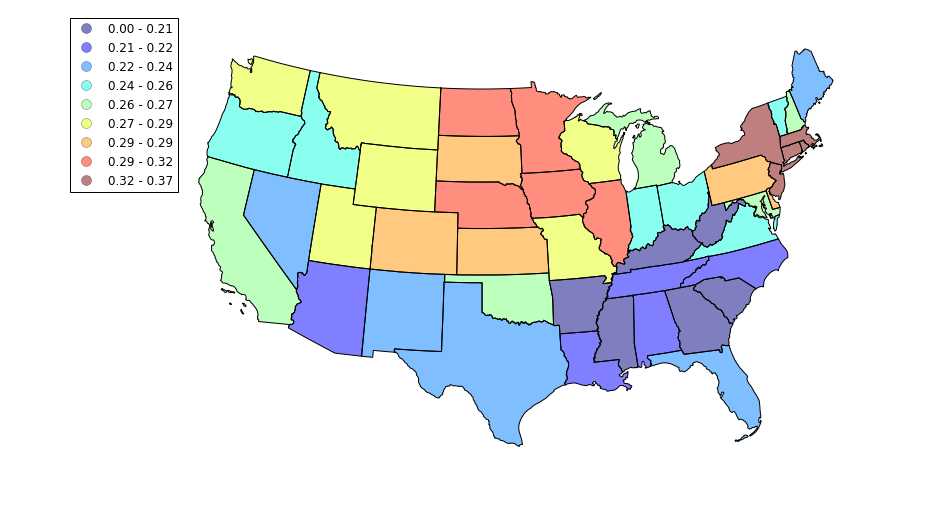

In [34]:
ax = merged.to_crs(epsg = 2163).plot(column = "BACHELORS", scheme = "QUANTILES", 
                 figsize = (15, 10), k = 9, legend = True)
ax.set_axis_off()